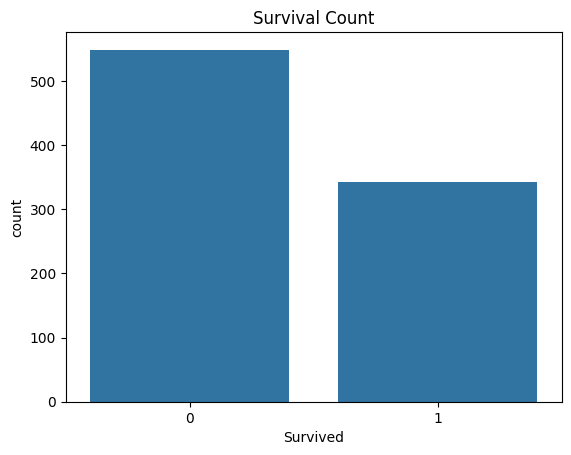

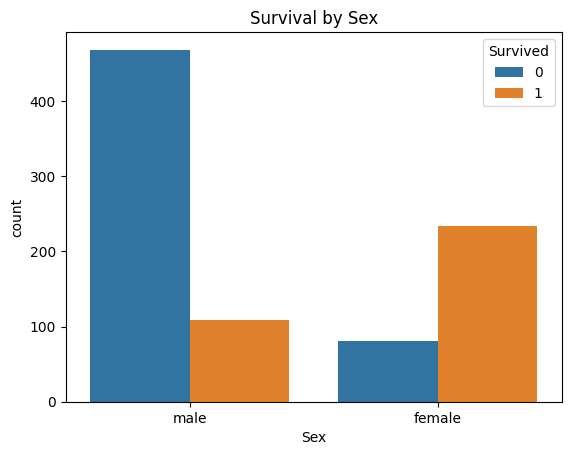

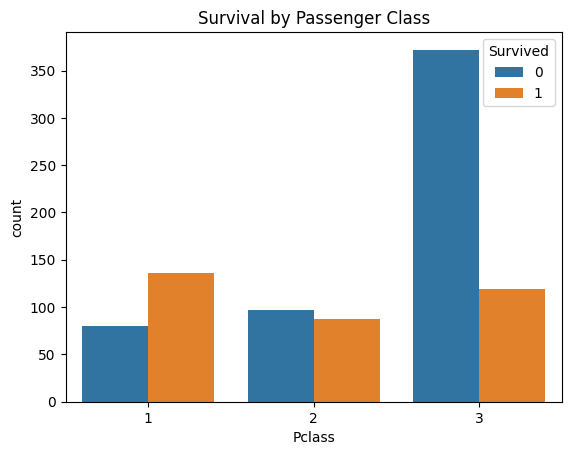

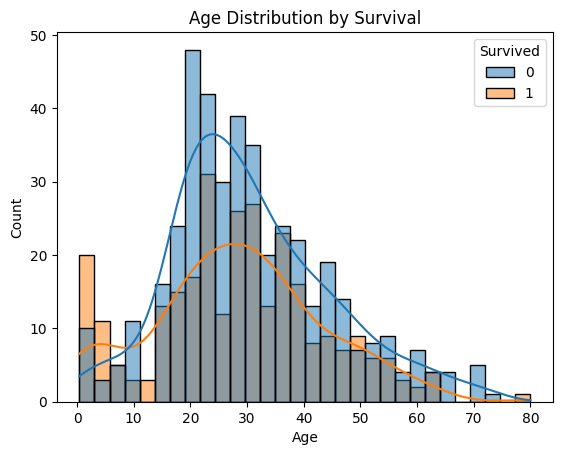





✅ Accuracy: 0.776536312849162
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179





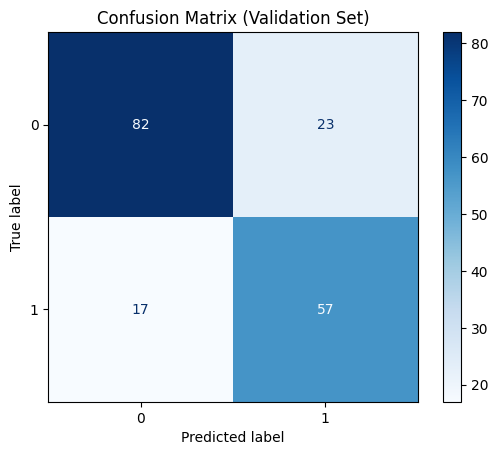



✅ Final predictions saved to final_predictions.csv
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

🎯 Conclusion:
- The Naive Bayes model achieved ~77% accuracy.
- Visualizations showed females and higher classes had better survival chances.
- Model predicted survival for test set; results saved as final_predictions.csv.



In [5]:
# Titanic Survival Prediction using Naive Bayes

#  1. Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#  2. Load the Datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

#  3. Exploratory Data Analysis (EDA)
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

print("\n")
print("\n")

sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Sex')
plt.show()

print("\n")
print("\n")

sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

print("\n")
print("\n")

sns.histplot(data=train_df, x='Age', kde=True, hue='Survived', bins=30)
plt.title('Age Distribution by Survival')
plt.show()

print("\n")
print("\n")

#  4. Data Cleaning on train.csv
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

le_sex = LabelEncoder()
train_df['Sex'] = le_sex.fit_transform(train_df['Sex'])

le_embarked = LabelEncoder()
train_df['Embarked'] = le_embarked.fit_transform(train_df['Embarked'])

#  5. Feature and Label Separation
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

#  6. Train-Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#  7. Model Training
model = GaussianNB()
model.fit(X_train, y_train)

#  8. Evaluation on Validation Set
y_pred = model.predict(X_valid)

print("✅ Accuracy:", accuracy_score(y_valid, y_pred))
print("✅ Classification Report:\n", classification_report(y_valid, y_pred))

print("\n")

ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()

print("\n")
#  9. Prepare test.csv for final prediction
test_passenger_ids = test_df['PassengerId']
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna('S')

test_df['Sex'] = le_sex.transform(test_df['Sex'])
test_df['Embarked'] = le_embarked.transform(test_df['Embarked'])

X_test_final = test_df.drop('PassengerId', axis=1)
final_predictions = model.predict(X_test_final)

#  10. Save final predictions
submission_df = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': final_predictions
})
submission_df.to_csv('final_predictions.csv', index=False)
print("✅ Final predictions saved to final_predictions.csv")
print(submission_df.head())

#  11. Conclusion
print("""
🎯 Conclusion:
- The Naive Bayes model achieved ~77% accuracy.
- Visualizations showed females and higher classes had better survival chances.
- Model predicted survival for test set; results saved as final_predictions.csv.
""")
